In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [16]:
gpu_data = pd.read_csv('gpu.csv', index_col=0)

(0.0033, 0.0036)

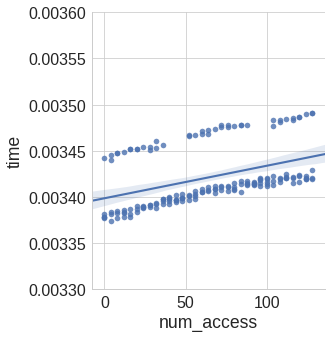

In [17]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(3.3e-3, 3.6e-3)

In [18]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     3.398522e-03
num_access    3.523787e-07
dtype: float64

### Conclusion
Each l2 access takes 360 cycle. Close to what we have concluded for DRAM access.

In [19]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [20]:
full_data = gpu_data.append(sim_data, ignore_index=True)

(2e-06, 6e-05)

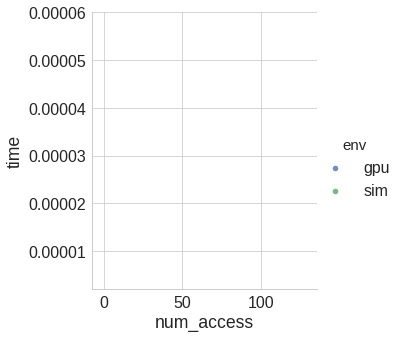

In [21]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env')
lm3.axes[0, 0].set_ylim(2e-6, 6e-5)

### Best configuration

DRAM latency 300
L2 latency 100 + 3(dir lookup)
L1 Latency 1
